[<img src="images/quantum_algorithms_tutorials.png" alt="drawing" width="100" align="left"/>][8]

<h2 align="center">
Hamiltonian simulation
</h2>

**[[Homepage][8]]**
**[[Open with the nbviewer][9]]**

<h3 align="left">
Introduction
</h3>

Any quantum circuit can be described by simulation of some Hamiltonian. The reason for this is the fact, that every quantum circuit (without effects of noise) can be described by a unitary transformation and for any unitary transformation $U$ we can find a Hamiltonian $H$, such that $U = e^{-iHt}$, where $t$ is a real number. In the circuit model quantum computation, the problem of Hamiltonian simulation can be described in this way: for given $H$ Hamiltonian operator construct $U = e^{-iHt}$ circuit [[1], [2]]. This problem can be described with Schrödinger’s equation: The time evolution of the state of a closed quantum system is described by the Schrödinger equation [[3]]:

$$i \hbar \frac{d}{dt} \left|\psi \right\rangle = H \left|\psi \right\rangle$$

where $\left|\psi \right\rangle$ is the quantum state, $\hbar$ is Plank's constant, $H$ is a fixed Hermitian operator known as the Hamiltonian of the closed system. When $H$ doesn't have a dependence on $t$ time (hereafter we will consider only time-independent Hamiltonians), the solution of the Schrödinger’s equation will be [[3]]:

$$\left|\psi(t) \right\rangle = e^{-iHt} \left|\psi(0) \right\rangle$$

$e^{-iHt}$ is a unitary operator because  $H$ is a Hermitian operator, hence $e^{-iHt}$ it can be implemented with quantum gates. 

Hamiltonian simulation has a wide range of applications in quantum computing. For example, as can be seen from the Schrödinger’s equation, simulation of quantum systems (e.g. molecules) requires the Hamiltonian simulation step. Additionally, Hamiltonian simulation is one of the main subroutines used in the various quantum algorithms: e.g. the quantum phase estimation algorithm ([QPE][5] and [IQPE][6] algorithms), the quantum algorithm for solving linear systems of equations (HHL algorithm), quantum approximate optimization algorithm (QAOA), adiabatic state preparation algorithm and etc. So, it is hard to overestimate the importance of Hamiltonian simulation in quantum computation.

  [1]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [2]: https://science.sciencemag.org/content/273/5278/1073
  [3]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [4]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459
  [8]: https://github.com/DavitKhach/quantum-algorithms-tutorials
  [9]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb

<h3 align="left">
Constructing a circuit for $e^{iHt}$
</h3>

Any Hermitian (Hamiltonian) matrix $H$ can be decomposed by the sum of Pauli tensor products terms (hereafter Pauli terms) with real coefficients (see this thread in Quantum Computing SE [[4]]). An example of 3 qubit Hamiltonian:

$$H = 11 \sigma_z \otimes \sigma_z + 7 \sigma_z \otimes \sigma_x - 5\sigma_z \otimes \sigma_x \otimes \sigma_y$$

The final circuit for $e^{iHt}$ can be simulated by (first order) Trotter decomposition [[1], [2]]:

$$e^{iHt} \approx \big(\prod_k e^{i c_k P_k t/N }\big)^{N}$$

where $t$ is a parameter that can have either positive or negative values, $P_k$ are the Pauli terms, $c_k$ are the coefficients of the corresponding $P_k$s, $H = \sum_k c_k P_k$, $N$ is the Trotter number. By increasing $N$ it is possible to decrease the error of the Trotter decomposition as much as desired [[2]]. If all $P_k$ Pauli terms are commuting to each other, then we can take $N = 1$ (no Trotter decomposition is needed). To understand why we are doing the Trotter decomposition let's consider two commuting Hermitian operators $A$ and $B$ (Pauli terms are Hermitian operators). Let's prove that $e^{i(A+B)t} = e^{iAt}e^{iBt}$ with Taylor series:

\begin{equation*}
e^{i(A+B)t} = I + i(A+B)t 
 \frac{\left( i(A+B)t \right)^2}{2!} + \frac{\left( i(A+B)t \right)^3}{3!} + ... = 
\\
= I e^{iBt} + iAt e^{iBt} + \frac{\left(iAt\right)^2}{2!} e^{iBt} = e^{iAt}e^{iBt}
\end{equation*}
 
where

$$e^{iAt} = I + iAt 
 \frac{\left( iAt \right)^2}{2!} + \frac{\left( iAt \right)^3}{3!} + ...
 \\
 e^{iBt} = I + iBt 
 \frac{\left( iBt \right)^2}{2!} + \frac{\left( iBt \right)^3}{3!} + ...$$
 
Here we took into account that, for example, $ABB = BAB = BBA$, because the operators $A$ and $B$ commute $AB = BA$. If this is not true then there will be complications and we will need the Trotter decomposition.

If the Hamiltonian is given in the matrix form and we don't know the corresponding $H = \sum_k c_k P_k$ Pauli decomposition we can find the coefficients $c_k$ of the corresponding Pauli term with the following equality [[4]]:

$$c_k = \frac{1}{2^n}Tr(P_k \cdot H)$$

where $n$ is the qubit number ($Tr(I\otimes I \otimes...\otimes I) = 2^n$). This equality can be proved by taking into account that trace of all Pauli terms are equal to $0$, except for $I\otimes I \otimes...\otimes I$ and 

$$P_k \cdot H = c_k I\otimes I \otimes...\otimes I + \sum_{k' \ne k} P_k \cdot c_{k'} P_{k'}$$

If we will know how to simulate all individual Pauli terms $e^{i c_k P_k t}$ it will be easy to simulate whole Hamiltonian by using Trotter decomposition. Let's consider simulating the $e^{i \sigma_z \otimes \sigma_z \otimes ... \otimes \sigma_z t}$ Pauli term. After knowing how to simulate this term, it will be easy to understand the simulation procedure of all Pauli terms. Here is the circuit for $e^{i \sigma_z \otimes \sigma_z t}$ from the paper [[1]]:

<img src="images/exp_sigma_z.png" alt="drawing" width="200"/>

In the circuit $R_z$'s argument is $-2t$ ($R_z(-2t) = e^{i\sigma_z t}$). Before showing why this is true let's introduce 2 formulas that we will us. 4.2 exercise from [[3]] textbook: Let $t$ be a real number and $A$ a matrix such that $A^2 = I$. Then

$$e^{iA t} = \cos(t) I + i \sin(t) A$$

For all Pauli terms, this $P_k^2 =I$ is true. So we can use this formula. For CNOT gate we have:

$$\mathrm{CNOT} = \left| 0 \right\rangle \left\langle 0 \right| \otimes I + \left| 1 \right\rangle \left\langle 1 \right| \otimes \sigma_x$$

By taking these formulas into account let's show that the circuit implements the $e^{i \sigma_z \otimes \sigma_z t}$ Pauli term:

\begin{align*}
e^{i \sigma_z \otimes \sigma_z t} = \cos(t) I + i \sin(t) \sigma_z \otimes \sigma_z 
\end{align*}

The circuit:

\begin{align*}
&\mathrm{CNOT} \left(I \otimes e^{i \sigma_z  t}\right) \mathrm{CNOT}= 
\big[ \left| 0 \right\rangle \left\langle 0 \right| \otimes I + \left| 1 \right\rangle \left\langle 1 \right| \otimes \sigma_x \big] \\ 
&\big[ \cos(t) I\otimes I + i \sin(t) I \otimes \sigma_z \big]
\big[\left| 0 \right\rangle \left\langle 0 \right| \otimes I + \left| 1 \right\rangle \left\langle 1 \right| \otimes \sigma_x \big] = \\
&= \cos(t) I + i \sin(t) \sigma_z \otimes \sigma_z 
\end{align*}

So, the circuit implements what we want:

$$
e^{i \sigma_z \otimes \sigma_z t} =\mathrm{CNOT} \left(I \otimes e^{i \sigma_z  t}\right) \mathrm{CNOT}
$$

The circuit for the $e^{i \sigma_z \otimes \sigma_z \otimes \sigma_z t}$ Pauli term from the same paper [[1]]:

<img src="images/exp_sigma_zz.png" alt="drawing" width="400"/>

The correctness of the circuit can be proved in the same way. Moreover, this solution can be generalized for $e^{i \sigma_z \otimes \sigma_z \otimes ... \otimes \sigma_z t}$ Pauli term. 

Now, what if we have one $\sigma_x$ in the tensor product $P = P_1 \otimes \sigma_x^{(n)} \otimes P_2$, where $P_1$ and $P_2$ are also Pauli terms, $n$ is the qubit number. Note that:

\begin{align*}
e^{iP_1 \otimes \sigma_x^{(n)} \otimes P_2t} &= \cos(t) I + i \sin(t) P_1 \otimes \sigma_x^{(n)} \otimes P_2 = \\
&= \cos(t) I + i \sin(t) P_1 \otimes \left(H \sigma_z^{(n)} H\right) \otimes P_2 = \\
&= H^{(n)} e^{iP_1 \otimes \sigma_z^{(n)} \otimes P_2t} H^{(n)}
\end{align*}

where $H^{(n)}$ is the Hadamard gate acting on $n$th qubit. Here we took into account that $\sigma_x = H \sigma_z H$. The same can be shown for $\sigma_y$:

\begin{align*}
e^{iP_1 \otimes \sigma_y^{(n)} \otimes P_2t} = H_y^{(n)} e^{iP_1 \otimes \sigma_z^{(n)} \otimes P_2t} H_y^{(n)}
\end{align*}

where $H_y$ is a self-inverse gate, which has this nice property $\sigma_y = H_y \sigma_z H_y$: 

$$H_y = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & -i \\
i & -1
\end{pmatrix}
$$

Now, we can simulate any Pauli term. For example, the circuit for $e^{i \sigma_y \otimes \sigma_y \otimes \sigma_x}$ will look like this:

$$e^{i \sigma_y \otimes \sigma_y \otimes \sigma_x} = \big[ H_y \otimes H_y \otimes H \big]  e^{i \sigma_z \otimes \sigma_z \otimes \sigma_z} \big[H_y \otimes  H_y \otimes H\big]  $$

<img src="images/exp_yyx.png" alt="drawing" width="400"/>

By applying appropriate rotations we can bring any Pauli term simulation problem to the simple $e^{i \sigma_z \otimes \sigma_z \otimes ... \otimes \sigma_z t}$ Pauli term simulation problem, whose solution we already know. With this approach, we can simulate any Pauli term, and thus also any Hermitian operator.

  [1]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [2]: https://science.sciencemag.org/content/273/5278/1073
  [3]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [4]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [7]: https://qiskit.org/documentation/_modules/qiskit/extensions/standard/u1.html
  [8]: https://quantumcomputing.stackexchange.com/a/11391/9459

<h3 align="left">
$I$ operators in the Pauli product terms
</h3>

Here we will show that we can ignore $I$ operators in the Pauli products when we construct the circuits for $e^{iPt}$ terms. For example, let's take $\sigma_z \otimes I \otimes \sigma_z$ operator and show that we can forget about the second qubit and simulate the circuit for $e^{i\sigma_z \otimes \sigma_z t}$ applied on the first and the third qubits. We should proof that:

$$e^{i\sigma_z \otimes I \otimes \sigma_z t} = CNOT^{(1,3)}R_z^{(3)}(-2t)CNOT^{(1,3)}$$

For the left side, we have:

$$e^{i\sigma_z \otimes I \otimes \sigma_z t} = \cos(t) I \otimes I \otimes I + \sin(t) \sigma_z \otimes I \otimes \sigma_z$$

For the right side:

\begin{align}
&CNOT^{(1,3)}R_z^{(3)}(-2t)CNOT^{(1,3)} = \big[ \left| 0 \right\rangle \left\langle 0 \right| \otimes I \otimes I + \left| 1 \right\rangle \left\langle 1 \right| \otimes I \otimes X  \big] \\
&\big[ I \otimes I \otimes \big( \cos(t) I + i \sin(t) \sigma_z \big) \big]
\big[ \left| 0 \right\rangle \left\langle 0 \right| \otimes I \otimes I  + \left| 1 \right\rangle \left\langle 1 \right| \otimes I \otimes X \big]=
\\
&= \cos(t) I \otimes I \otimes I + \sin(t) \sigma_z \otimes I \otimes \sigma_z
\end{align}

So, as one can see they are equal to each other: we can forget about $I$ operator for constructing a circuit in this case. This solution can be generalized for $n$ $I$ operators between two $\sigma_z$ terms.

Also, let's proof that $e^{i I \otimes P \otimes I t} = I \otimes e^{i P t} \otimes I$, where $P$ is some Pauli term:

\begin{align}
&e^{i I \otimes P \otimes I t} = \cos(t) I \otimes I \otimes I + i\sin(t) I \otimes P \otimes I 
\\
&= I \otimes \big( \cos(t) I + i \sin(t) P \big) \otimes I = I \otimes e^{i P t} \otimes I
\end{align}

In this manner, it can be shown for general cases that $I$ operators in $P$ Pauli terms can be ignored while constructing circuits for $e^{iPt}$.

  [1]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [2]: https://science.sciencemag.org/content/273/5278/1073
  [3]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [4]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

<h3 align="left">
Controlled version of $e^{iHt}$
</h3>

Often in the algorithms (e.g. in HHL or [QPE][5]), we need to construct not the circuit for $e^{iHt}$, but the controlled version of it. First of all, note that if we have $U = A \cdot B \cdot C$ circuit, where $A$, $B$ and $C$ are some operators, then the controlled version of that circuit will be equal to $cU = cA \cdot cB \cdot cC$, where $c$ denotes control version of an operator. We already know that in the Trotter decomposition $e^{iHt}$ consists of $e^{iPt}$ terms, where $P$ is a Pauli term. Therefore, the controlled version of the $e^{iHt}$ can be constructed with the controlled versions of the same $e^{iPt}$ terms. Here is a general form of the circuit that implements any given $e^{iPt}$ and the controlled version of it for the three-qubit case [[1]]:

<img src="images/exp_pauli_and_controled.png" alt="drawing" width="670"/>

where $O_i$ are gates from the set $\{I, H, H_y\}$, and they are chosen differently for each Pauli term. The right circuit in the picture implements the controlled version of the $e^{iPt}$, because, if control qubit is in the $\left| 0 \right\rangle$ state the $R_z$ gate will not work and the rest gates will cancel each other (they are self-inverse gates) [[1]]. 

The implementation of $e^{iIt}$ Pauli term wasn't discussed above for constructing the circuit for the $e^{iHt}$, because it corresponds to a global phase gate and can be ignored. In contrast, the controlled-$e^{iIt}$ in the controlled-$e^{iHt}$ is not a global phase and its implementation also should be added. Let's call it controlled-global phase gate ($CGP$). The effect of $CGP$ for controlled qubit $\alpha \left| 0_c \right\rangle + \beta \left| 1_c \right\rangle$ acting on multi-qubit $\left| \psi \right\rangle$ state:

$$ CGP \big( \left( \alpha \left| 0_c \right\rangle + \beta \left| 1_c \right\rangle \right) \left| \psi \right\rangle \big) = \left( \alpha \left| 0_c \right\rangle + e^{it}\beta \left| 1_c \right\rangle \right) \left| \psi \right\rangle$$

This action can be done just by one Qiskit's $u1$ phase gate acting on the control qubit [[3]]:

$$ u1(t) \otimes I \big( \left( \alpha \left| 0_c \right\rangle + \beta \left| 1_c \right\rangle \right) \left| \psi \right\rangle \big) = \left( \alpha \left| 0_c \right\rangle + e^{it} \beta \left| 1_c \right\rangle \right) \left| \psi \right\rangle,$$

where

$$u1(t) = \begin{pmatrix} 1 & 0 \\ 0 & e^{it}\end{pmatrix}$$

  [1]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [2]: https://science.sciencemag.org/content/273/5278/1073
  [3]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [4]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

<h3 align="left">
The code
</h3>

Before going into Qiskit code, note that:

\begin{equation*}
H_y = u2(\pi/2, \pi/2)
\qquad \qquad
H = u2(0, \pi)
\\
u2(\varphi, \lambda) = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\varphi} & e^{i(\varphi + \lambda)}
\end{pmatrix}
\end{equation*}

So, we can implement $H_y$ with $u2(\pi/2, \pi/2)$ gate in the code, where $u2$ is one of the Qiskit basis gates. For $H$ gate we can use either $h$ gate or $u2(0, \pi)$ gate in the code.

Firstly we should define what Hamiltonian we want to simulate. Let's do simulation for this Hamiltonian:

$$H = 2 \cdot \sigma_x \otimes \sigma_z \otimes \sigma_x + 5 \cdot \sigma_z \otimes \sigma_y \otimes I + 7 \cdot I \otimes \sigma_y \otimes \sigma_z$$

It can be shown that all three terms commute to each other, thus we can write $e^{iHt}$ in this form without Trotter decomposition:

$$e^{iHt} = e^{i2 \cdot \sigma_x \otimes \sigma_z \otimes \sigma_x t} \; \cdot \; e^{i5 \cdot \sigma_z \otimes \sigma_y \otimes I t} \; \cdot \; e^{i7 \cdot I \otimes \sigma_y \otimes \sigma_z t}$$

The fact that we don't need to do Trotter decomposition will help us to have a simple circuit. Here we start coding:

In [1]:
from qiskit import *
import numpy as np

In [2]:
def exp_all_z(circuit, quantum_register, 
              pauli_idexes, control_qubit=None, t=1):
    """
    The implementation of exp(iZZ..Z t), where Z is 
    the Pauli Z operator, t is a parameter.
    :param circuit: QuantumCircuit.
    :param quantum_register: QuantumRegister.
    :param pauli_idexes: the indexes from quantum_register that 
                         correspond to entries not equal to I: 
                         e.g. if we have XIYZI then the 
                         pauli_idexes = [0,2,3].
    :param control_qubit: the control Qubit from QuantumRegister 
                          other than quantum_register.
    :param t: the parameter t in exp(iZZ..Z t).
    """
    # the controlled_exp(iIt) special case
    if len(pauli_idexes) == 0 and control_qubit is not None:
        circuit.add_register(control_qubit.register)
        circuit.u1(t, control_qubit)
        return
        
    # the first CNOTs
    for i in range(len(pauli_idexes) - 1):
        circuit.cx(quantum_register[pauli_idexes[i]],
                   quantum_register[pauli_idexes[i + 1]])
    
    # Rz gate
    if control_qubit is None:
        circuit.rz(-2 * t, quantum_register[pauli_idexes[-1]])
    else:
        circuit.add_register(control_qubit.register)
        circuit.crz(-2 * t, 
                    control_qubit, quantum_register[pauli_idexes[-1]])
    
    # the second CNOTs
    for i in reversed(range(len(pauli_idexes) - 1)):
        circuit.cx(quantum_register[pauli_idexes[i]],
                   quantum_register[pauli_idexes[i + 1]])

In [3]:
def exp_pauli(pauli, quantum_register, control_qubit=None, t=1):
    """
    The circuit for the exp(i P t), where P is the Pauli term, 
    t is the parameter.
    :param pauli: the string for the Pauli term: e.g. "XIXY".
    :param quantum_register: QuantumRegister.
    :param control_qubit: the control Qubit from QuantumRegister 
                          other than quantum_register.
    :param t: the parameter t in exp(i P t).
    :return: QuantumCircuit that implements exp(i P t) or 
             control version of it.
    """
    if len(pauli) != len(quantum_register):
        raise Exception("Pauli string doesn't match to the quantum register")

    pauli_circuit = QuantumCircuit(quantum_register)
    circuit_bracket = QuantumCircuit(quantum_register)
    pauli_idexes = []

    for i in range(len(quantum_register)):
        if pauli[i] == 'I':
            continue
        elif pauli[i] == 'Z':
            pauli_idexes.append(i)
        elif pauli[i] == 'X':
            circuit_bracket.h(quantum_register[i])
            pauli_idexes.append(i)
        elif pauli[i] == 'Y':
            circuit_bracket.u2(np.pi / 2, np.pi / 2, quantum_register[i])
            pauli_idexes.append(i)

    pauli_circuit += circuit_bracket
    exp_all_z(pauli_circuit, quantum_register, pauli_idexes, control_qubit, t)
    pauli_circuit += circuit_bracket

    return pauli_circuit

In [4]:
def hamiltonian_simulation(hamiltonian, quantum_register=None, 
                           control_qubit=None, t=1, trotter_number=1):
    """
    The implementation of exp(iHt), where H is the Hamiltonian 
    operator, t is the parameter.
    :param hamiltonian: dictionary of Pauli terms with their weights: 
                        e.g. {"XZX": 2, "ZYI": 5, "IYZ": 7}.
    :param quantum_register: QuantumRegister.
    :param control_qubit: the control Qubit from QuantumRegister 
                          other than quantum_register.
    :param t: the parameter t in exp(iHt).
    :param trotter_number: the Trotter number.
    :return: QuantumCircuit that corresponds to exp(iHt) 
             or control version of it.
    """
    if quantum_register is None:
        quantum_register = QuantumRegister(len(list(hamiltonian.keys())[0]))
    if control_qubit in quantum_register:
        raise Exception("the control qubit is in the target register")

    delta_t = t / trotter_number
    exp_hamiltonian = QuantumCircuit(quantum_register)
    exp_delta_t = QuantumCircuit(quantum_register)

    for pauli in hamiltonian:
        weight = hamiltonian[pauli]
        exp_delta_t += exp_pauli(pauli, quantum_register, 
                                 control_qubit, weight * delta_t)

    for i in range(trotter_number):
        exp_hamiltonian += exp_delta_t

    return exp_hamiltonian

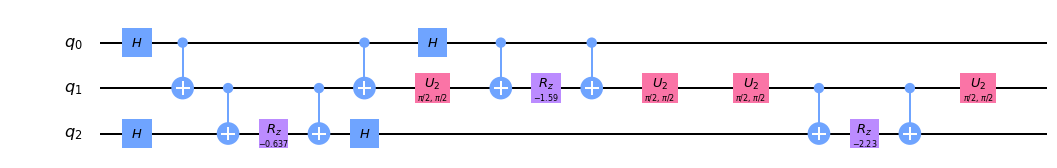

In [5]:
# put the Hamiltonian in the dictionary
hamiltonian = {"XZX": 2, "ZYI": 5, "IYZ": 7}

quantum_register = QuantumRegister(3, 'q')
circuit = hamiltonian_simulation(hamiltonian, 
                                 quantum_register, t=1/(2*np.pi))

# draw the circuit 
%matplotlib inline
circuit.draw(output="mpl")

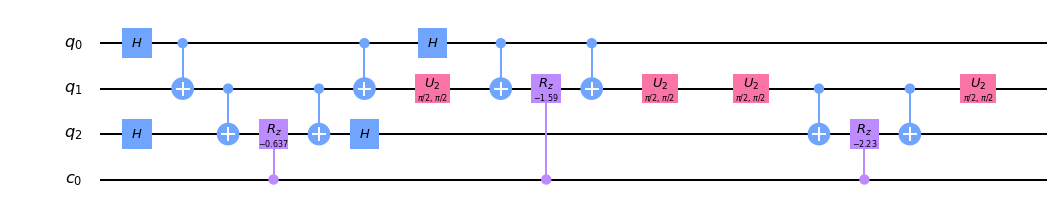

In [6]:
# now the controlled version of the same circuit
control_qubit = QuantumRegister(1, 'c')
control_circuit = hamiltonian_simulation(hamiltonian, quantum_register, 
                                 control_qubit[0], t=1/(2*np.pi))
control_circuit.draw(output="mpl")

Now let's simulate/evolve the same Hamiltonian by using Qiskit's `WeightedPauliOperator` and its `evolve` method in order to compare it with our obtained implementation. Here we should note that the labels/strings of the Pauli terms in `WeightedPauliOperator` are in the $P_{q_2} P_{q_1} P_{q_0}$ label format, where indexes correspond to qubit indexes. In contrast, in our defined `hamiltonian` dictionary mentioned in the code above, we used $P_{q_0} P_{q_1} P_{q_2}$ notation for the strings. So, the Hamiltonian in the `WeightedPauliOperator` will be with the reversed ordering of the strings/keys described in our `hamiltonian` dictionary.

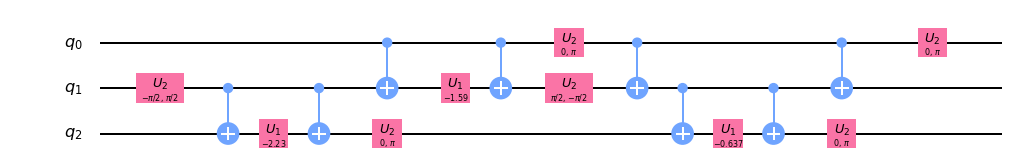

In [7]:
from qiskit.aqua.operators import WeightedPauliOperator
pauli_dict = {
        'paulis': [{"coeff": {"imag": 0.0, "real": 2}, "label": "XZX"},
                   {"coeff": {"imag": 0.0, "real": 5}, "label": "IYZ"},
                   {"coeff": {"imag": 0.0, "real": 7}, "label": "ZYI"}
                   ]
}
hamiltonian = WeightedPauliOperator.from_dict(pauli_dict)

qiskit_evolve_circuit = QuantumCircuit(quantum_register)
qiskit_evolve_circuit = hamiltonian.evolve(
    quantum_registers=quantum_register, evo_time=-1/(2*np.pi))

# construct the circuit with Qiskit basis gates
qiskit_evolve_circuit = transpile(
    qiskit_evolve_circuit, basis_gates=['u1', 'u2', 'u3', 'cx'])

# draw the circuit 
qiskit_evolve_circuit.draw(output="mpl")

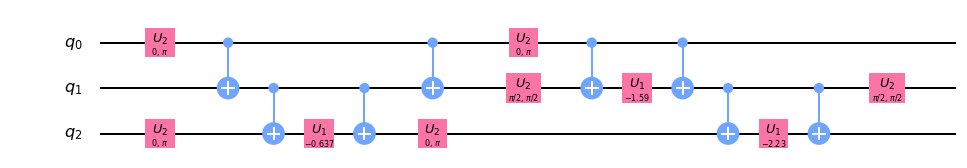

In [8]:
# Let's transpile our previously obtained circuit and draw it
circuit = transpile(circuit, basis_gates=['u1', 'u2', 'u3', 'cx'])
circuit.draw(output="mpl")

Here we will show that these two circuits are equivalent. As one can see our `hamiltonian_simulation` method evolves the Pauli terms in the reversed order than the Qiskit's `evolve` method. The order here is not important, because the Trotter decomposition can be done with different orders of $e^{iPt}$ terms. For this specific chosen Hamiltonian the Pauli terms commute with each other, hence $e^{iPt}$ terms also commute (the order doesn't matter). Another difference between these implementations is that, instead $H_Y = u2(\pi/2, \pi/2)$ Qiskit uses $u2(\pi/2, -\pi/2)$ with its inverse $u2(-\pi/2, \pi/2)$. Note that like $\sigma_y = H_Y \sigma_z H_Y$, the same way:

$$\sigma_y = u2 \left( \pi/2, - \pi/2 \right) \sigma_z u2 \left(-\pi/2, \pi/2 \right)$$

So, these gates are doing the same job as the $H_Y$ gate in our case. The order of the appearance of the $u2(\pi/2, -\pi/2)$ and its inverse $u2(-\pi/2, \pi/2)$ gates in the circuit is important. In contrast, we can forget about this kind of ordering for $H_Y$, because it is a self inverse gate. In this sense, $H_Y$ is a more preferable gate as was pointed out [here][7]. In conclusion, we can say that the circuits that were obtained with the `hamiltonian_simulation` function and Qiskit's `evolve` method are equivalent.

  [1]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [2]: https://science.sciencemag.org/content/273/5278/1073
  [3]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [4]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

**[[Homepage][8]]**

<h3 align="left">
References
</h3>

[[1]]  [J.D. Whitfield,  J. Biamonte  and  A. Aspuru-Guzik,
Molecular Physics, "Simulation of electronic structure Hamiltonians using
quantum computers" (2011)][1]

[[2]] [Seth Lloyd, Science, "Universal Quantum Simulators" (1996)
][2]

[[3]] [M.A. Nielsen, I.L. Chuang, Cambridge University Press New York, "Quantum Computation and Quantum Information: 10th Anniversary Edition
10th" (2011)][3]

[[4]] [Quantum computing SE question "Can arbitrary matrices be-decomposed using the pauli basis"][4]

  [1]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [2]: https://science.sciencemag.org/content/273/5278/1073
  [3]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [4]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [6]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459
  [8]: https://github.com/DavitKhach/quantum-algorithms-tutorials
  [9]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb